Classification using a SGDClassifier on the MNIST dataset and plotting the ROC curve.

In [4]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# global variables
seed = 42

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
X, y = mnist.data, mnist.target

Loading the data and spliting them into training (6/7) and test (1/7) sets.

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

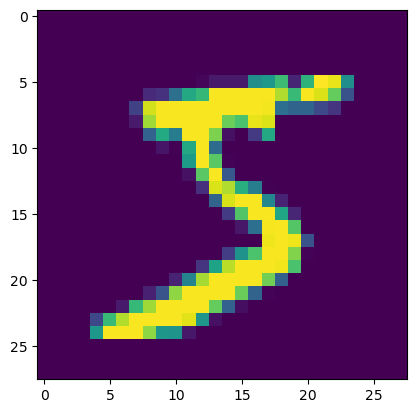

This is a 5


In [14]:
# display the first digit and its label value of the training set
plt.imshow(X_train[0].reshape((28,28)))
plt.show()
print(f"This is a {y_train[0]}")

Training a SGDClassifier to distinguish between two classes, 4 and not-4.

In [16]:
# True for all 4s, False for all other digits
y_train_4 = (y_train == '4')  
y_test_4 = (y_test == '4')

# Training the data with a SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=seed)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

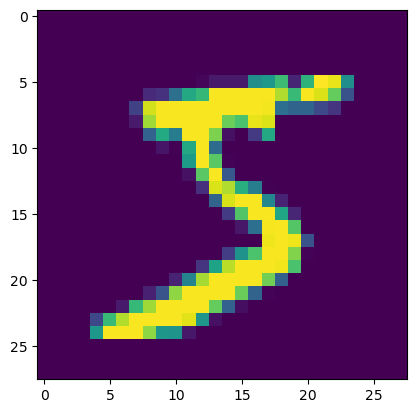

This is not a four


In [17]:
# display the first digit and its label value of the training set
plt.imshow(X_train[0].reshape((28,28)))
plt.show()
print(f"This is {'a four' if y_train_4[0] else 'not a four'}")

Using 3-fold cross validation and evaluating my model by calculating the metrics: accuracy, recall, and precision. Comparing the accuracy of my model to the accuracy of a model that always guesses that an image is not a 4.

In [28]:
# calculate the accuracy, recall and precision of the training set
from sklearn.model_selection import cross_validate
scores = cross_validate(sgd_clf, X_train, y_train_4, cv=3,
                        scoring=['accuracy', 'recall', 'precision'])

In [29]:
print(f"Accuracy of each fold: {scores['test_accuracy']}, mean accuracy: {100*scores['test_accuracy'].mean():.1f}%")
print(f"Recall of each fold: {scores['test_recall']}, mean recall: {100*scores['test_recall'].mean():.1f}%")
print(f"Precision of each fold: {scores['test_precision']}, mean precision: {100*scores['test_precision'].mean():.1f}%")

Accuracy of each fold: [0.9671  0.97645 0.9687 ], mean accuracy: 97.1%
Recall of each fold: [0.94350282 0.8366718  0.93531828], mean recall: 90.5%
Precision of each fold: [0.77023061 0.91414141 0.78466839], mean precision: 82.3%


In [30]:
# an easy way to calculate the accuracy of a model that always guesses an image is not a 4, you can sum up all the correct guesses,
# i.e., the non-4 images in the dataset, and divide that by the total number of images. 
non_4_accuracy = (y_train_4 == 0).sum()/len(y_train_4)
print (f"Accuracy of a model that always guesses not a 4: {100*non_4_accuracy:.1f}%")

Accuracy of a model that always guesses not a 4: 90.3%


In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_pred)

array([[52957,  1201],
       [  554,  5288]], dtype=int64)

52957 were correctly calssified as non-4s (TN)

5288 were correctly classified as 4s (TP)

1201 were wrongly classified as 4s (FP)

554 were wrongly classified as non-4s (FN)

Ploting the ROC curve and calculating the area under the curve (AUC).

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method="decision_function")

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_scores)

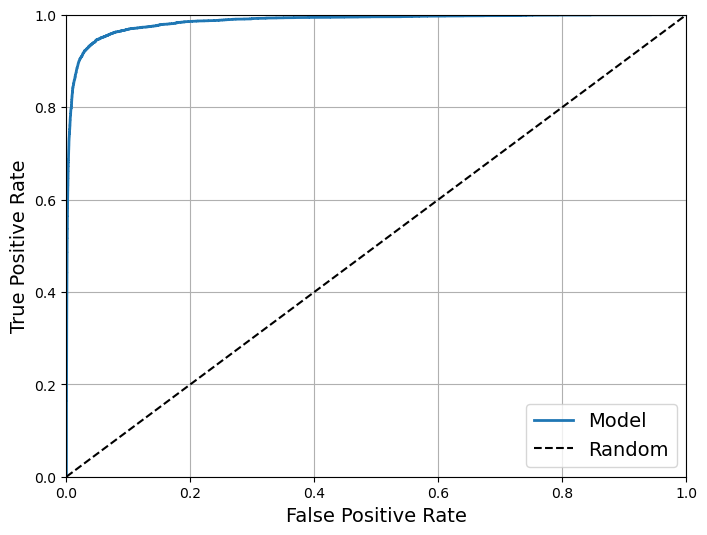

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))                  
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.axis([0, 1, 0, 1])              
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()

plot_roc_curve(fpr, tpr, "Model")

In [36]:
# calculating the area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9859276923382874

With this model demonstration we can conclude that the area under the curve and the ROC perform well on the training data.